In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
%matplotlib inline

tableau10 = [(78, 121, 167), (242, 142, 43), (225, 87, 89), 
             (118, 183, 178), (89, 161, 79), (237, 201, 72), 
             (176, 122, 161), (225, 157, 167), (156, 117, 95), 
             (186, 176, 172)]

for i in range(len(tableau10)):    
    r, g, b = tableau10[i]    
    tableau10[i] = (r / 255., g / 255., b / 255.) 

In [2]:
# 2015 rates
# https://www.irs.com/articles/2015-federal-tax-rates-personal-exemptions-and-standard-deductions
def calculate_tax(taxable_income):
    if taxable_income <= 9225:
        tax_bracket = 0.10
        tax_paid = tax_bracket*taxable_income
    elif taxable_income <= 37450:
        tax_bracket = 0.15
        tax_paid = 922.50 + tax_bracket*(taxable_income - 9225)
    elif taxable_income <= 90750:
        tax_bracket = 0.25
        tax_paid = 5156.25 + tax_bracket*(taxable_income - 37450)
    elif taxable_income <= 189300:
        tax_bracket = 0.28
        tax_paid = 18481.25 + tax_bracket*(taxable_income - 90750)
    elif taxable_income <= 411501:
        tax_bracket = 0.33
        tax_paid = 46075.25 + tax_bracket*(taxable_income - 189300)
    elif taxable_income <= 413200:
        tax_bracket = 0.35
        tax_paid = 119401.25 + tax_bracket*(taxable_income - 411500)
    else:
        tax_bracket = 0.396
        tax_paid = 119996.25 + tax_bracket*(taxable_income - 413200)
    
    incorrect_tax = tax_bracket*taxable_income
    if taxable_income != 0:
        actual_tax_rate = tax_paid / taxable_income
    else:
        actual_tax_rate = 0
    
    return(tax_paid, incorrect_tax, tax_bracket, actual_tax_rate)  

In [3]:
taxable_income = 150000
taxbill, incorrect_tax, tax_bracket, actual_rate = calculate_tax(taxable_income)
print 'Your taxable income:', '$' + str(taxable_income)
print 'Your marginal tax bracket:', str(tax_bracket*100) + '%'
print 'Your actual tax rate:', str(round(actual_rate*100, 2)) + '%'
print 'Federal income tax to pay:', '$' + str(taxbill)

Your taxable income: $150000
Your marginal tax bracket: 28.0%
Your actual tax rate: 23.38%
Federal income tax to pay: $35071.25


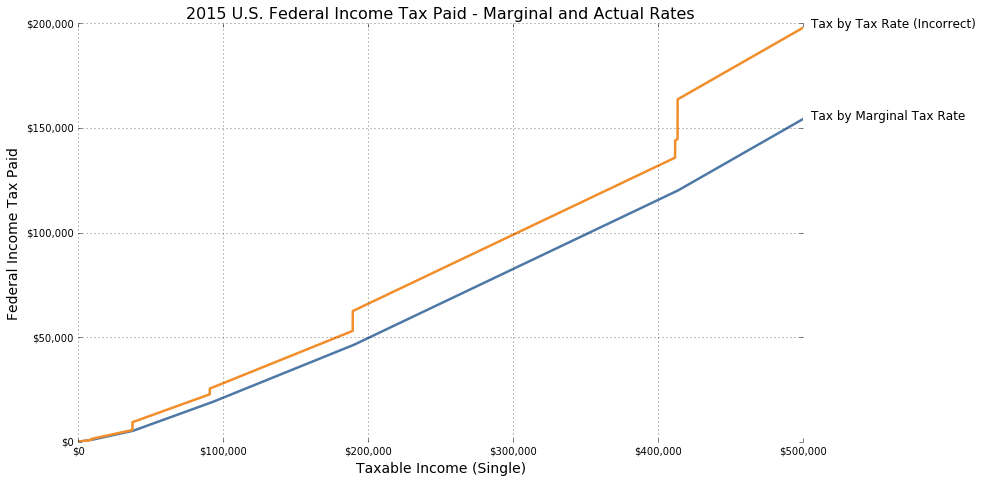

In [27]:
#tableau10 = 4e79a7, f28e2b, e15759, 76b7b2, 59a14f, edc948, b07aa1, ff9da7, 9c755f, bab0ac
income = 500000
income_vec = range(0, income, 1)

# Preallocate some vectors
tax_to_pay = range(0, income, 1)
incorrect_tax = range(0, income, 1)
tax_bracket = range(0, income, 1)
actual_tax_rate = range(0, income, 1)

for i in income_vec:
    tax_to_pay[i], incorrect_tax[i], tax_bracket[i], actual_tax_rate[i] = calculate_tax(income_vec[i])
    
plt.figure(figsize = (13, 7.5))

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
    
plt.plot(income_vec, tax_to_pay, lw = 2.5, color=tableau10[0])
plt.plot(income_vec, incorrect_tax, lw = 2.5, color=tableau10[1])
plt.grid(True)

plt.text(income_vec[-1] + 5000, tax_to_pay[-1], 'Tax by Marginal Tax Rate', fontsize = 12)
plt.text(income_vec[-1] + 5000, incorrect_tax[-1], 'Tax by Tax Rate (Incorrect)', fontsize = 12)

plt.xlabel('Taxable Income (Single)', fontsize = 14)
plt.ylabel('Federal Income Tax Paid', fontsize = 14)
plt.title('2015 U.S. Federal Income Tax Paid - Marginal and Actual Rates', fontsize = 16)

fmt = '${x:,.0f}'
tick = tkr.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.yaxis.set_major_formatter(tick)

plt.show()

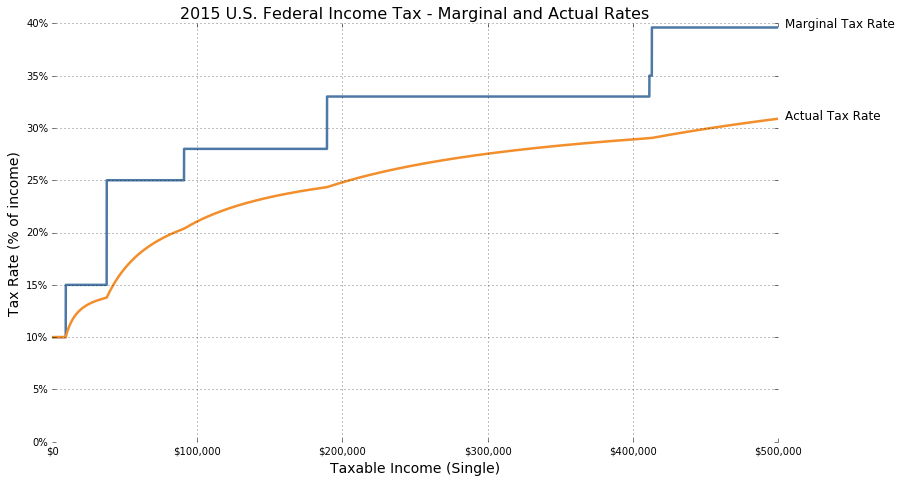

In [12]:
plt.figure(figsize = (13, 7.5))

ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    
    
plt.plot(income_vec, tax_bracket, lw = 2.5, color=tableau10[0])
plt.plot(income_vec, actual_tax_rate, lw = 2.5, color=tableau10[1])
plt.grid(True)

plt.text(income_vec[-1] + 5000, tax_bracket[-1], 'Marginal Tax Rate', fontsize = 12)
plt.text(income_vec[-1] + 5000, actual_tax_rate[-1], 'Actual Tax Rate', fontsize = 12)

plt.xlabel('Taxable Income (Single)', fontsize = 14)
plt.ylabel('Tax Rate (% of income)', fontsize = 14)
plt.title('2015 U.S. Federal Income Tax - Marginal and Actual Rates', fontsize = 16)

fmt = '${x:,.0f}'
tick = tkr.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

fmt = '{x:,.0%}'
tick = tkr.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.xlim([2, income])

plt.show()